<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [176]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [177]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [178]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               754 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             760 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       758 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [180]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [181]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:\n", missing_percentage)


Percentage of missing values in each column:
 Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64


In [182]:
missing_values_table=pd.DataFrame({
    'Missing values:':missing_percentage
})
missing_values_table

,Missing values:
Pregnancies,1.822917
Glucose,0.000000
BloodPressure,0.000000
SkinThickness,1.041667
Insulin,0.000000
BMI,1.302083
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<Axes: >

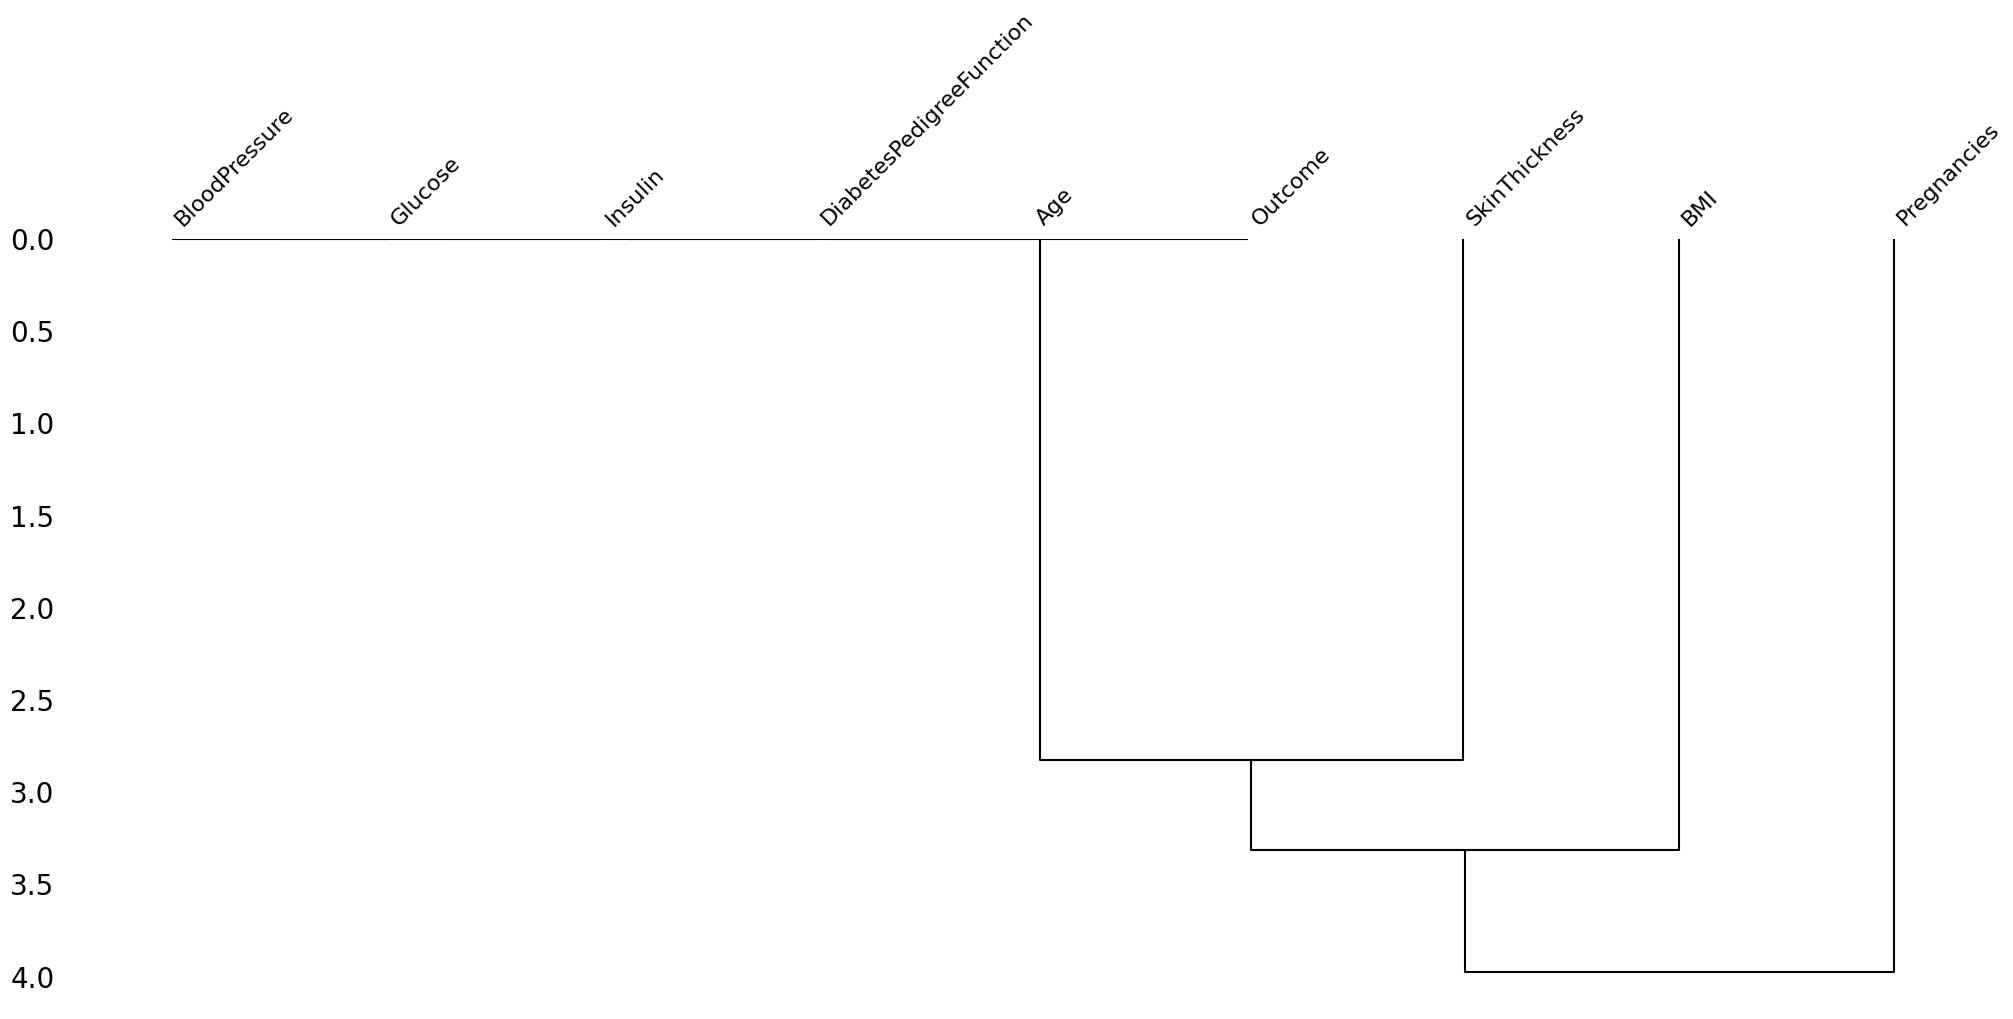

In [184]:
msno.dendrogram(df)

## <font color = 'Orange'>Handle the missing values</font>

In [185]:
df_imputed=df.copy()
imp=SimpleImputer(strategy='mean')
df_imputed=imp.fit_transform(df)
df_imputed = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
df_imputed.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [186]:
df_imputed.to_csv('New_diabetes.csv', index=False)


Print the first rows of your final Dataset

In [187]:
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [188]:
X=df_imputed.drop(columns='Outcome')
Y=df_imputed.Outcome

In [189]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
knn=KNeighborsClassifier(n_neighbors=5)


In [192]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [193]:
y_pred = knn.predict(x_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [194]:
confusion_matrix(y_test, y_pred)

array([[86, 20],
       [27, 21]])

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79       106
         1.0       0.51      0.44      0.47        48

    accuracy                           0.69       154
   macro avg       0.64      0.62      0.63       154
weighted avg       0.68      0.69      0.69       154

